Predicting life expectancy for different countries with the GapMinder dataset using KMeans Clustering using Python Scikit Learn and Pandas
-------------------------------------------------------------------------------------------------------------------------------------

A *k-means cluster analysis* was conducted on the *GapMinder* dataset to identify underlying subgroups of countries based on their similarity of responses on 14 variables that represent characteristics that could have an impact on *life expectancy*. Clustering variables included the following variables income per person, alcohol consumption, armed forces rate, breast cancer per 100th, co2 emissions, female employment rate, hiv rate, internet use rate, oil per person, polity score, relectric per person, suicide per 100th, employment rate, urbanization rate. The variable *life expectancy* was *not used* in clustering, it was used later as *ground truth*, to verify whether the clusters obtained were significantly different by comparing mean *life expectancy* across the clusters (with *ANOVA* and *Tukey HSD* tests). All clustering variables were standardized (*z-score normalized*) to have a mean of 0 and a standard deviation of 1.

After removing the obeservations with missing values in the variable *life expectancy*, the data were first imputed (all the missing values in other variables were replaced by the corresponding median values) and then randomly split into a training set that included 70% of the observations (N=133) and a test set that included 30% of the observations (N=58). 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
''')

In [20]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
%matplotlib inline
"""
Data Management
"""
data = pd.read_csv("gapminder.csv")

#upper-case all DataFrame column names
#data.columns = map(str.upper, data.columns)

# Data Management

data_clean = data.drop('country', 1)
data_clean = data_clean.convert_objects(convert_numeric=True) #.dtypes
#data_clean = data_clean.dropna()
data_clean = data_clean.dropna(subset = ['lifeexpectancy'])

# subset clustering variables
cluster=data_clean[['incomeperperson','alcconsumption','armedforcesrate',
                     'breastcancerper100th','co2emissions','femaleemployrate','hivrate', 
                     'internetuserate','oilperperson','polityscore','relectricperperson',
                     'suicideper100th','employrate','urbanrate']]
cluster.describe()

# standardize clustering variables to have mean=0 and sd=1
clustervar=cluster.copy()
clustervar = clustervar.fillna(clustervar.median())
clustervar['incomeperperson']=preprocessing.scale(clustervar['incomeperperson'].astype('float64'))
clustervar['alcconsumption']=preprocessing.scale(clustervar['alcconsumption'].astype('float64'))
clustervar['armedforcesrate']=preprocessing.scale(clustervar['armedforcesrate'].astype('float64'))
clustervar['breastcancerper100th']=preprocessing.scale(clustervar['breastcancerper100th'].astype('float64'))
clustervar['co2emissions']=preprocessing.scale(clustervar['co2emissions'].astype('float64'))
clustervar['femaleemployrate']=preprocessing.scale(clustervar['femaleemployrate'].astype('float64'))
clustervar['hivrate']=preprocessing.scale(clustervar['hivrate'].astype('float64'))
clustervar['internetuserate']=preprocessing.scale(clustervar['internetuserate'].astype('float64'))
clustervar['oilperperson']=preprocessing.scale(clustervar['oilperperson'].astype('float64'))
clustervar['polityscore']=preprocessing.scale(clustervar['polityscore'].astype('float64'))
clustervar['relectricperperson']=preprocessing.scale(clustervar['relectricperperson'].astype('float64'))
clustervar['suicideper100th']=preprocessing.scale(clustervar['suicideper100th'].astype('float64'))
clustervar['employrate']=preprocessing.scale(clustervar['employrate'].astype('float64'))
clustervar['urbanrate']=preprocessing.scale(clustervar['urbanrate'].astype('float64'))

# split data into train and test sets
clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)

# k-means cluster analysis for 1-9 clusters                                                           
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])

A series of k-means cluster analyses were conducted on the training data specifying k=1-9 clusters, using Euclidean distance. The variance in the clustering variables that was accounted for by the clusters (r-square) was plotted for each of the nine cluster solutions in an *elbow curve* to provide guidance for choosing the number of clusters to interpret.The *elbow curve* was inconclusive, suggesting that the 2, 3, 4 and 8-cluster solutions might be interpreted. The results below are for an interpretation of the 3-cluster solution.

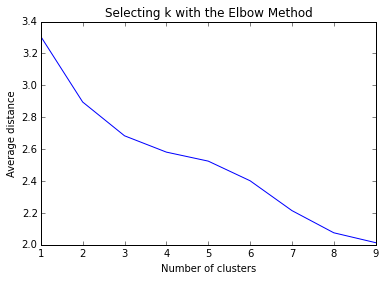

In [2]:
"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""

plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

*Canonical discriminant analyses* was used to reduce the 14 clustering variable down a few variables that accounted for most of the variance in the clustering variables. A scatterplot of the first two canonical variables by cluster (as shown below in the next figure) indicated that the observations in clusters were packed with relatively low within-cluster variance, and did not overlap much with the other clusters. Cluster 2 was generally distinct and densely packed and the observations had low spread suggesting low within-cluster variance. Observations in cluster 0 were spread out more than the other clusters, showing high within-cluster variance. The results of this plot suggest that the best cluster solution may have 3 or more than 3 clusters, so it will be especially important to also evaluate the cluster solutions with more than 3 clusters.

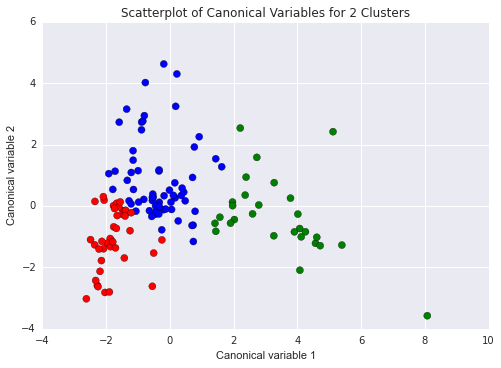

In [3]:
# Interpret 6 cluster solution
model3=KMeans(n_clusters=3)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)

# plot clusters
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
colors = cm.spectral(clusassign.astype(float) / 2)
colors = map(lambda x: 'red' if(x == 1) else 'blue' if(x == 2) else 'green', clusassign)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=colors, s=50)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show()

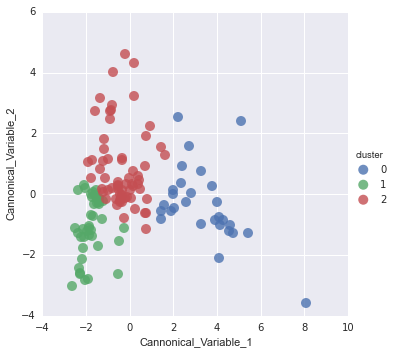

In [4]:
df = pd.DataFrame(data={'Cannonical_Variable_1': plot_columns[:,0], 'Cannonical_Variable_2': plot_columns[:,1], 'cluster':clusassign})
#print(df.head())
sns.lmplot(x='Cannonical_Variable_1', y='Cannonical_Variable_2', data=df, hue='cluster', fit_reg=False,
           dropna=True,scatter_kws={"marker": "D", "s": 100})  

('For n_clusters =', 2, 'The average silhouette_score is :', 0.32945606670855726)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.17168449435596303)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.17342876115661005)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.17617082738748485)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.20452964033683593)


C:\Python27\lib\site-packages\numpy\core\_methods.py:55: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


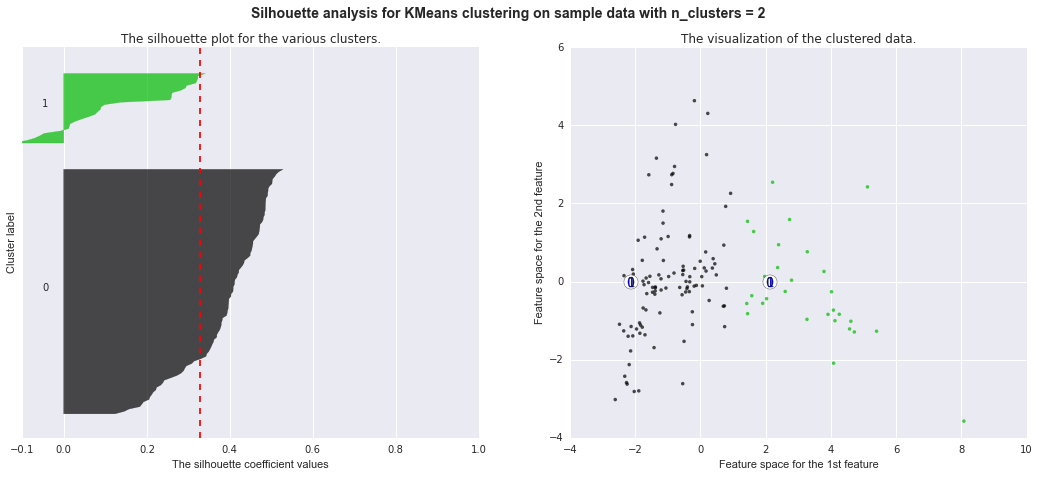

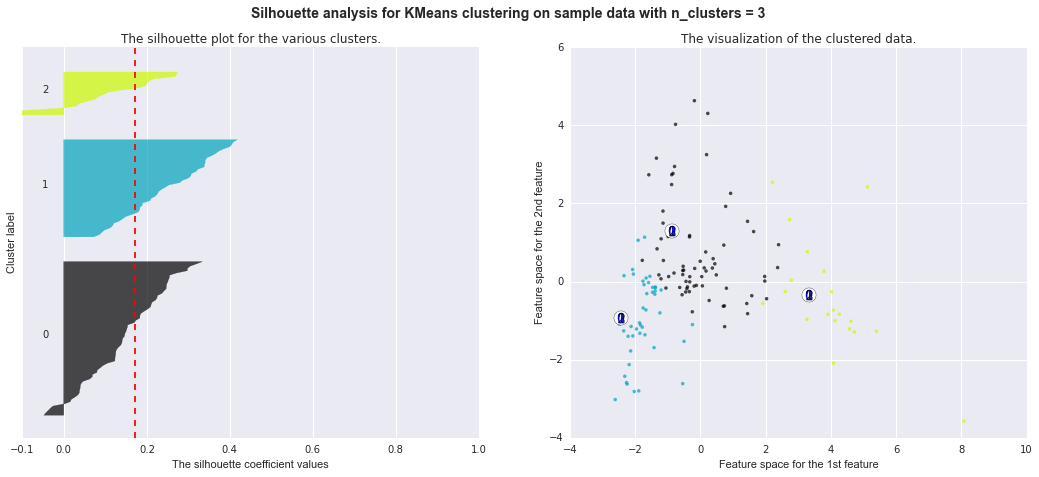

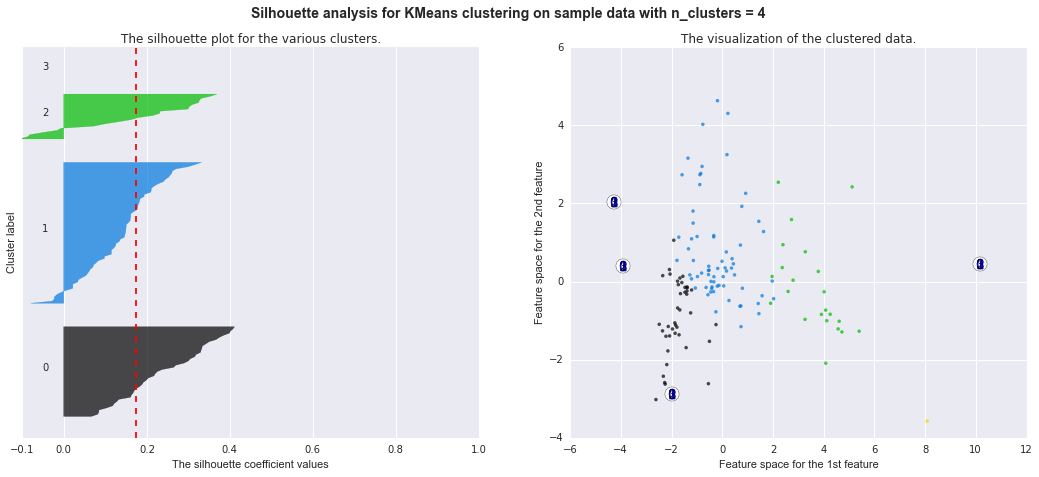

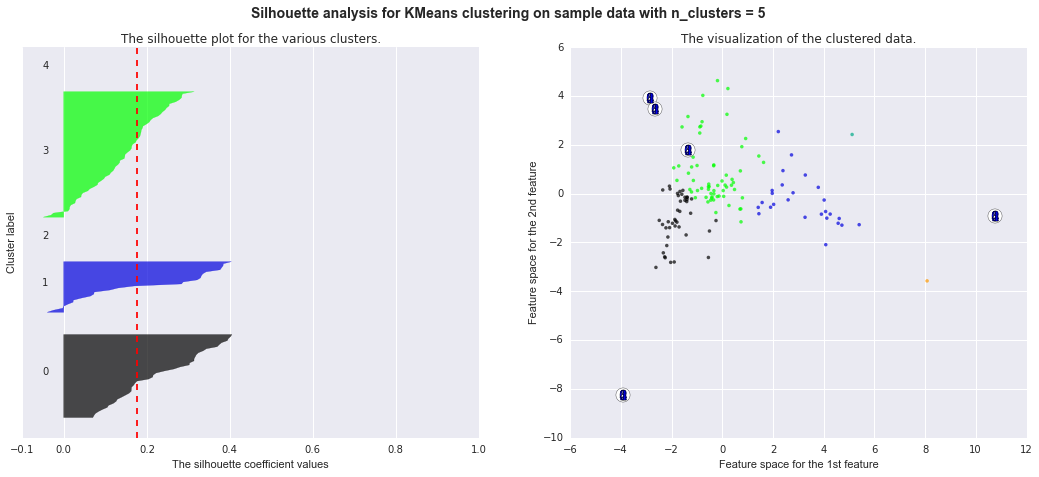

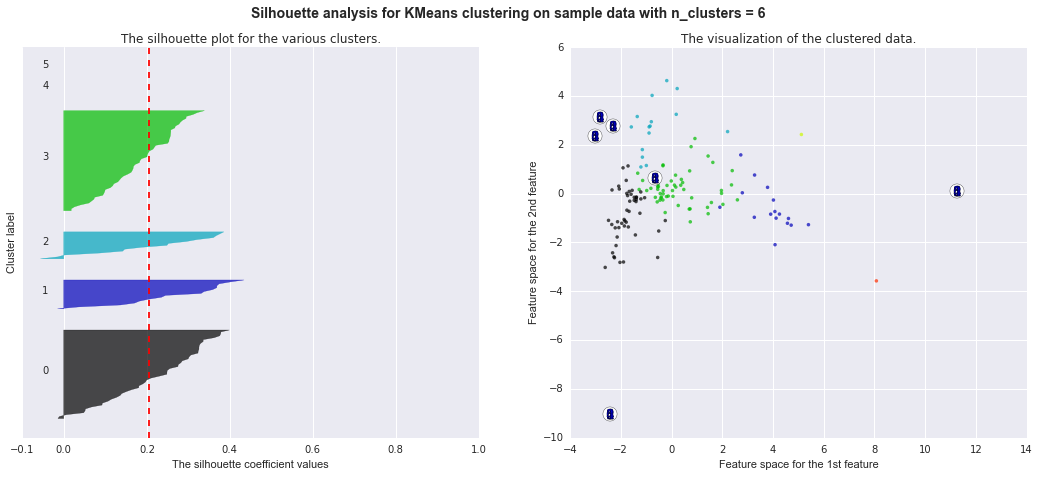

In [5]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(clus_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(clus_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(clus_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(clus_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x=plot_columns[:,0], y=plot_columns[:,1], marker='.', s=50, lw=0, alpha=0.7, c=colors,)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    centers_columns = pca_2.fit_transform(centers)
    ax2.scatter(centers_columns[:, 0], centers_columns[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(centers_columns[:,0], centers_columns[:,1], marker='$%d$' % i, alpha=1, s=100)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Evaluation of KMeans with k-means++ init


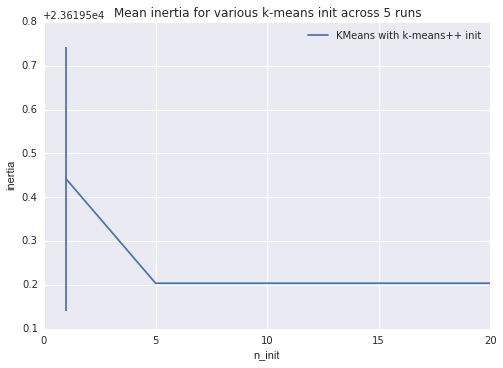

In [9]:
random_state = np.random.RandomState(0)

# Number of run (with randomly generated dataset) for each strategy so as
# to be able to compute an estimate of the standard deviation
n_runs = 5

# k-means models can do several random inits so as to be able to trade
# CPU time for convergence robustness
n_init_range = np.array([1, 5, 10, 15, 20])

fig = plt.figure()
plots = []
legends = []

factory = KMeans 
init = 'k-means++'
params = {}
n_clusters = 3

print("Evaluation of %s with %s init" % (factory.__name__, init))
inertia = np.empty((len(n_init_range), n_runs))

for run_id in range(n_runs):
    for i, n_init in enumerate(n_init_range):
        km = factory(n_clusters=n_clusters, init=init, random_state=run_id,
                     n_init=n_init, **params).fit(clus_train)
        inertia[i, run_id] = km.inertia_
p = plt.errorbar(n_init_range, inertia.mean(axis=1), inertia.std(axis=1))
plots.append(p[0])
legends.append("%s with %s init" % (factory.__name__, init))

plt.xlabel('n_init')
plt.ylabel('inertia')
plt.legend(plots, legends)
plt.title("Mean inertia for various k-means init across %d runs" % n_runs)
plt.show()

Clusters 0, 1 and 2 contained 28, 42, 63 observations respectively. The means on the clustering variables showed that, compared to the other clusters, countries in cluster 0 had high levels on most of the clustering variables. They had a relatively high income per person, alcohol consumption, breastcancer percentage, co2 emissions, internet use rate, oil per person, urban rate, suicide percentage, but moderate levels of armed forces rate, employment rate and female employment rate. They also appeared to have the lowest levels of hiv rate. Similarly, we can describe the other 2 clusters by the means of the clustering variables as shown below.

In [21]:
"""
BEGIN multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""
clus_train = pd.DataFrame(clus_train)
# create a unique identifier variable from the index for the 
# cluster training data to merge with the cluster assignment variable
clus_train.reset_index(level=0, inplace=True)
# create a list that has the new index variable
cluslist=list(clus_train['index'])
# create a list of cluster assignments
labels=list(model3.labels_)
# combine index variable list with cluster assignment list into a dictionary
newlist=dict(zip(cluslist, labels))
newlist
# convert newlist dictionary to a dataframe
newclus=DataFrame.from_dict(newlist, orient='index')
newclus
# rename the cluster assignment column
newclus.columns = ['cluster']

# now do the same for the cluster assignment variable
# create a unique identifier variable from the index for the 
# cluster assignment dataframe 
# to merge with cluster training data
newclus.reset_index(level=0, inplace=True)
# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
# cluster frequencies
merged_train.cluster.value_counts()

"""
END multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""

# FINALLY calculate clustering variable means by cluster
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)

Clustering variable means by cluster
             index         0         1         2         3         4  \
cluster                                                                
0        65.714286  1.538475  0.760138  0.011147  1.306950  0.569876   
1        61.547619 -0.573720 -0.577666 -0.418215 -0.676802 -0.092707   
2        69.095238 -0.363449 -0.029717  0.193216 -0.152813 -0.146593   

                5         6         7         8         9        10        11  \
cluster                                                                         
0        0.172466 -0.340029  1.486122  1.002050  0.491119  1.248254  0.189620   
1        0.698932  0.261283 -0.919388 -0.225554 -0.479426 -0.435333  0.031863   
2       -0.581180 -0.025354 -0.130583 -0.247051  0.002781 -0.311070 -0.397225   

               12        13  
cluster                      
0        0.062857  1.101800  
1        0.795325 -0.924312  
2       -0.585185  0.165104  


In order to externally validate the clusters, an *Analysis of Variance* (ANOVA) was conducted to test for significant differences between the clusters on *life expectancy*. A *tukey test* was used for *post hoc comparisons* between the clusters. Results indicated significant differences between the clusters on *life expectancy* (F(2, 130)=58.08, p<.0001). The tukey post hoc comparisons showed significant differences between all of the 3 clusters on *life expectancy*. Countries in cluster 0 had the highest *life expectancy* (mean=79.32, sd=2.85), and cluster 3 had the lowest *life expectancy* (mean=61.6, sd=8.38).

In [11]:
# validate clusters in training data by examining cluster differences in lifeexpectancy using ANOVA
# first have to merge lifeexpectancy with clustering variables and cluster assignment data 
lifeexpectancy_data=data_clean['lifeexpectancy']
# split lifeexpectancy data into train and test sets
lifeexpectancy_train, lifeexpectancy_test = train_test_split(lifeexpectancy_data, test_size=.3, random_state=123)
lifeexpectancy_train1=pd.DataFrame(lifeexpectancy_train)
lifeexpectancy_train1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(lifeexpectancy_train1, merged_train, on='index')
merged_train_all['lifeexpectancy'] = merged_train_all['0_x']
sub1 = merged_train_all[['lifeexpectancy', 'cluster']].dropna()

import statsmodels.formula.api as smf

lifeexpectancymod = smf.ols(formula='lifeexpectancy ~ C(cluster)', data=sub1).fit()
print (lifeexpectancymod.summary())

Clustering variable means by cluster
           level_0      index         0         1         2         3  \
cluster                                                                 
0        65.714286  65.714286  1.538475  0.760138  0.011147  1.306950   
1        61.547619  61.547619 -0.573720 -0.577666 -0.418215 -0.676802   
2        69.095238  69.095238 -0.363449 -0.029717  0.193216 -0.152813   

                4         5         6         7         8         9        10  \
cluster                                                                         
0        0.569876  0.172466 -0.340029  1.486122  1.002050  0.491119  1.248254   
1       -0.092707  0.698932  0.261283 -0.919388 -0.225554 -0.479426 -0.435333   
2       -0.146593 -0.581180 -0.025354 -0.130583 -0.247051  0.002781 -0.311070   

               11        12        13  
cluster                                
0        0.189620  0.062857  1.101800  
1        0.031863  0.795325 -0.924312  
2       -0.397225 -0.585185  0.

means for lifeexpectancy by cluster
         lifeexpectancy
cluster                
0             79.324464
1             61.599333
2             71.456794


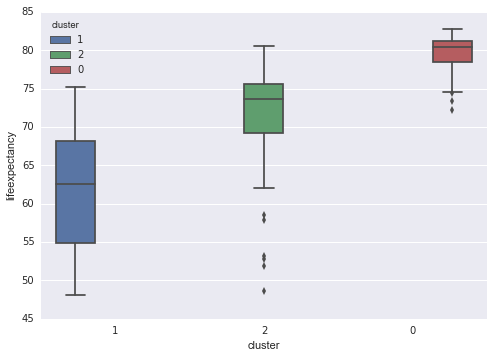

In [17]:
print ('means for lifeexpectancy by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)

sns.boxplot(x="cluster", y="lifeexpectancy", hue="cluster", data=sub1) #, palette="PRGn")
#sns.boxplot(sub1.lifeexpectancy, groupby=sub1.cluster) 

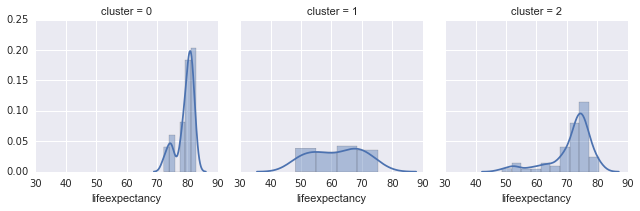

In [18]:
g = sns.FacetGrid(sub1, col="cluster")  
g.map(sns.distplot, "lifeexpectancy")  

In [13]:
print ('standard deviations for lifeexpectancy by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

import statsmodels.stats.multicomp as multi 

mc1 = multi.MultiComparison(sub1['lifeexpectancy'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())

standard deviations for lifeexpectancy by cluster
         lifeexpectancy
cluster                
0              2.847906
1              8.382371
2              7.061208
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  0      1    -17.7251 -21.7172 -13.733  True 
  0      2    -7.8677  -11.5841 -4.1512  True 
  1      2     9.8575   6.5979   13.117  True 
----------------------------------------------


In [14]:
"""
VALIDATION
BEGIN multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster in test data set
"""
clusassign=model3.predict(clus_test)
clus_test = pd.DataFrame(clus_test)
# create a variable out of the index for the cluster training dataframe to merge on
clus_test.reset_index(level=0, inplace=True)
# create a list that has the new index variable
cluslistval=list(clus_test['index'])
# create a list of cluster assignments
labelsval=list(clusassign)
# combine index variable list with labels list into a dictionary
newlistval=dict(zip(cluslistval, clusassign))
newlistval
# convert newlist dictionary to a dataframe
newclusval=DataFrame.from_dict(newlistval, orient='index')
newclusval
# rename the cluster assignment column
newclusval.columns = ['cluster']
# create a variable out of the index for the cluster assignment dataframe to merge on
newclusval.reset_index(level=0, inplace=True)
# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable
merged_test=pd.merge(clus_test, newclusval, on='index')
# cluster frequencies
merged_test.cluster.value_counts()
"""
END multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""

# calculate test data clustering variable means by cluster
clustergrpval = merged_test.groupby('cluster').mean()
print ("Test data clustering variable means by cluster")
print(clustergrpval)

Test data clustering variable means by cluster
             index         0         1         2         3         4  \
cluster                                                                
0        30.083333  1.665091  0.706143 -0.057190  1.387202  0.120254   
1        30.200000 -0.562181 -0.256216 -0.042824 -0.725118 -0.188946   
2        26.461538 -0.185431  0.057726  0.254732 -0.026375 -0.018908   

                5         6         7         8         9        10        11  \
cluster                                                                         
0        0.145309 -0.263278  1.470878  0.323087  0.638233  1.092147  0.315470   
1        0.975337  0.556141 -0.708892 -0.167463 -0.288587 -0.378082  0.623598   
2       -0.723859 -0.300740  0.067574 -0.136450  0.166242 -0.100531  0.081538   

               12        13  
cluster                      
0        0.074531  0.874936  
1        0.976838 -1.131510  
2       -0.720312  0.373080  
